In [ ]:
# Importing necessary libraries for database management, data manipulation, machine learning, and visualization.
import sqlite3  # For SQLite database management.
import pandas as pd  # For data manipulation and analysis.
import numpy as np  # For numerical operations.
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets.
from sklearn.linear_model import LinearRegression  # For performing linear regression modeling.
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance.
import matplotlib.pyplot as plt  # For data visualization.
import ipywidgets as widgets  # For creating interactive GUI components like buttons and text boxes.
from IPython.display import display  # For displaying widgets in Jupyter notebooks.

In [ ]:
class FinanceTracker:
# A class to track financial transactions and predict future spending using a linear regression model.

  def __init__(self, db_name='finance_tracker_db'):
    # Initializes the FinanceTracker object with a database name and creates the transactions table if it doesn't exist.
    self.db_name = db_name
    self.initialize_database()

  def establish_connection(self):
    # Establishes and returns a connection to the SQLite database.
    return sqlite3.connect(self.db_name)

  def initialize_database(self):
    # Creates a database table for transactions if it doesn't already exist.
    connection = self.establish_connection()
    with connection:
      cursor = connection.cursor()
      cursor.execute('''CREATE TABLE IF NOT EXISTS transactions
                        (date TEXT, category TEXT, description TEXT, amount REAL)''')
      connection.commit()

  def add_transaction(self, transaction, bulk=False):
  # Adds a single transaction or multiple transactions to the database.
    connection = self.establish_connection()
    with connection:
        cursor = connection.cursor()
        if bulk:
          cursor.executemany("INSERT INTO transactions VALUES (?, ?, ?, ?)", transaction)
        else:
          cursor.execute("INSERT INTO transactions VALUES (?, ?, ?, ?)", transaction)
    connection.commit()

  def generate_monthly_report(self, month):
    # Generates a monthly report of transactions grouped by category.
    connection = self.establish_connection()
    with connection:
      cursor = connection.cursor()
      query = "SELECT category, SUM(amount) FROM transactions WHERE date LIKE ? GROUP BY category"
      cursor.execute(query, (f"{month}%",))
      return cursor.fetchall()

  def retrieve_transactions(self):
    # Retrieves all transactions from the database, ordered by date in descending order.
    connection = self.establish_connection()
    return pd.read_sql_query("SELECT * FROM transactions ORDER BY date DESC", connection)

  def get_monthly_spending_data(self):
    # Retrieves total spending per month.
    connection = self.establish_connection()
    with connection:
      cursor = connection.cursor()
      cursor.execute("SELECT strftime('%Y-%m', date) as month, SUM(amount) FROM transactions GROUP BY month")
      return cursor.fetchall()

  def predict_future_spending(self):
    # Predicts future spending based on previous months' spending using linear regression.
    monthly_data = self.get_monthly_spending_data()
    months_index = np.array(range(len(monthly_data))).reshape(-1, 1)
    spending_values = np.array([x[1] for x in monthly_data])

    # Splitting the data into training and testing sets to avoid overfitting and underfitting.
    x_train, x_test, y_train, y_test = train_test_split(months_index, spending_values, test_size=0.2, random_state=42)

    # Training the linear regression model.
    model = LinearRegression().fit(x_train, y_train)

    # Predicting spending for the next month.
    predicted_spending = model.predict([[len(months_index)]])

    # Visualizing the spending over time.
    plt.scatter(months_index, spending_values, color='black')
    plt.plot(months_index, model.predict(months_index), color='blue', linewidth=3)
    plt.xlabel('Month Index')
    plt.ylabel('Spending (£)')
    plt.title('Monthly Spending Over Time')
    plt.show()

    # Calculating model evaluation metrics.
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Model Performance: MSE = {mse:.2f}, R^2 = {r2:.2f}")

    return round(predicted_spending[0], 2)

In [ ]:
# Initialize the Finance Tracker instance
tracker = FinanceTracker()

# Sample data for demonstration purposes
sample_data = [
    ("2023-01-05", "Utilities", "Electricity Bill", -120.50),
    ("2023-01-07", "Groceries", "Weekly groceries", -75.30),
    ("2023-01-12", "Dining", "Dinner at Joe's", -45.00),
    ("2023-01-15", "Transport", "Monthly train pass", -60.00),
    ("2023-01-20", "Entertainment", "Movie tickets", -25.00),
    ("2023-02-03", "Utilities", "Water Bill", -30.25),
    ("2023-02-06", "Groceries", "Fresh fruits and veggies", -50.00),
    ("2023-02-14", "Gifts", "Valentine's Day gift", -100.00),
    ("2023-02-20", "Health", "Gym membership", -35.00),
    ("2023-02-28", "Dining", "Brunch with friends", -40.00),
    ("2023-03-03", "Rent", "Monthly rent", -800.00),
    ("2023-03-07", "Groceries", "Supermarket shopping", -90.00),
    ("2023-03-15", "Transport", "Gas refill", -60.00),
    ("2023-03-22", "Entertainment", "Concert tickets", -90.00),
    ("2023-03-30", "Utilities", "Internet bill", -60.00),
    ("2023-04-05", "Utilities", "Gas Bill", -80.00),
    ("2023-04-12", "Groceries", "Market groceries", -65.00),
    ("2023-04-15", "Health", "Dentist Appointment", -200.00),
    ("2023-05-01", "Rent", "Monthly rent", -850.00),
    ("2023-05-08", "Dining", "Sushi Night", -70.00),
    ("2023-05-20", "Transport", "Bike Repair", -120.00),
    ("2023-06-03", "Entertainment", "Theme Park Tickets", -180.00),
    ("2023-06-18", "Travel", "Flight to New York", -350.00),
    ("2023-07-02", "Travel", "Hotel Booking", -600.00),
    ("2023-07-22", "Entertainment", "Music Festival Ticket", -150.00),
    ("2023-08-14", "Education", "Online Course Subscription", -120.00),
    ("2023-08-25", "Groceries", "BBQ Supplies", -90.00),
    ("2023-09-10", "Utilities", "Water Bill", -40.00),
    ("2023-09-15", "Dining", "Anniversary Dinner", -180.00),
    ("2023-10-05", "Health", "Gym Membership Renewal", -400.00),
    ("2023-10-21", "Entertainment", "Halloween Party Supplies", -75.00),
    ("2023-11-03", "Rent", "Monthly rent", -850.00),
    ("2023-11-17", "Gifts", "Birthday presents", -120.00),
    ("2023-12-01", "Travel", "Winter Vacation Booking", -1200.00),
    ("2023-12-25", "Gifts", "Christmas Gifts", -500.00),
    ("2024-01-01", "Entertainment", "New Year's Eve Party", -100.00),
    ("2024-01-10", "Utilities", "Electricity Bill", -110.00),
    ("2024-01-20", "Groceries", "Monthly groceries", -300.00),
    ("2024-02-14", "Gifts", "Valentine's Day chocolates", -50.00),
    ("2024-02-28", "Health", "Prescription Refill", -20.00),
    ("2024-03-15", "Transport", "Car Insurance", -600.00),
]

# Bulk add the sample transactions to the tracker
tracker.add_transaction(sample_data, bulk=True)

In [ ]:
# Creating interactive widgets for data input
date_picker = widgets.DatePicker(description='Select Date')
category_input = widgets.Text(description='Category')
description_input = widgets.Text(description='Description')
amount_input = widgets.FloatText(description='Amount')
submit_button = widgets.Button(description='Add Transaction')

def on_submit_button_clicked(button):
    # Handle the submit button action here
    print("Transaction added successfully.")

submit_button.on_click(on_submit_button_clicked)

# Display the input widgets
display(date_picker, category_input, description_input, amount_input, submit_button)

show_transactions_button = widgets.Button(description = 'Show Transactions')
def on_show_transactions_button_clicked(b):
  transactions_df = tracker.retrieve_transactions()
  display(transactions_df)
show_transactions_button.on_click(on_show_transactions_button_clicked)
display(show_transactions_button)

DatePicker(value=None, description='Select Date')

Text(value='', description='Category')

Text(value='', description='Description')

FloatText(value=0.0, description='Amount')

Button(description='Add Transaction', style=ButtonStyle())

Button(description='Show Transactions', style=ButtonStyle())

,date,category,description,amount
0,2024-03-15,Transport,Car Insurance,-600.0
1,2024-03-15,Transport,Car Insurance,-600.0
2,2024-02-28,Health,Prescription Refill,-20.0
3,2024-02-28,Health,Prescription Refill,-20.0
4,2024-02-14,Gifts,Valentine's Day chocolates,-50.0
...,...,...,...,...
77,2023-01-12,Dining,Dinner at Joe's,-45.0
78,2023-01-07,Groceries,Weekly groceries,-75.3
79,2023-01-07,Groceries,Weekly groceries,-75.3
80,2023-01-05,Utilities,Electricity Bill,-120.5


Report for 2023-01:
Dining: £-90.00
Entertainment: £-50.00
Groceries: £-150.60
Transport: £-120.00
Utilities: £-241.00


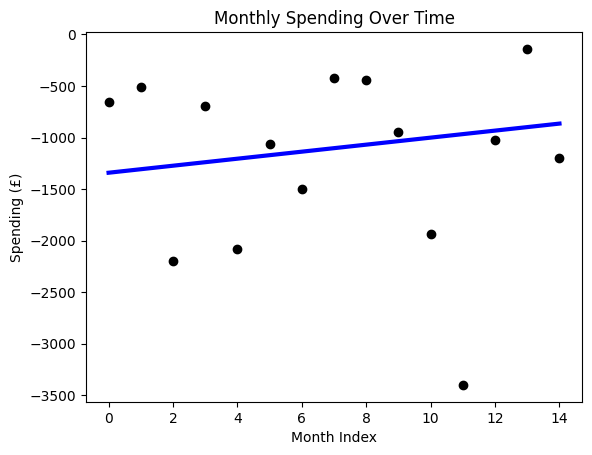

Model Performance: MSE = 2134668.60, R^2 = -0.41
Predicted spending for the next month: £-830.43


In [ ]:
# Generating a report for a specific month
month = '2023-01'  # Example month
report_data = tracker.generate_monthly_report(month)
print(f"Report for {month}:")
for category, amount in report_data:
    print(f"{category}: £{amount:.2f}")

# Predict future spending
predicted_spending = tracker.predict_future_spending()
print(f"Predicted spending for the next month: £{predicted_spending:.2f}")


In this model, a linear regression model is employed to predict future spending on previous months' spending data. Linear regression is a fundamental machine learning technique used for predictive modeling when the relationship between the independent variable (or variables) and the dependent variable is assumed to be linear. It's particularly well-suited for scenarios where we want to forecast a quantitative outcome - such as financial spending - based on one or more predictors.

**Reason for Splitting the Data**

The data is split into training and testing sets to evaluate the model's performance accurately. This separation helps in mitigating the risks of overfitting and underfitting.
- _Overfitting_ occurs when a model learns the detail and noise in the training data to the extent that it negatively impacts the model's performance on new data. This means the model is too complex, capturing noise along with the underlying pattern in the data.
- _Underfitting_ happens when a model cannot capture the underlying trend of the data. It's usually a result of a model being too simple to understand the complex patterns in the data.

Splitting the data allows us to train the model on one subset of data and test it on a separate subset, ensuring the model's ability to generalise to unseen data rather than memorising the training set.

**Evaluating Model Performance**

To evaluate the performance of the linear regression model, we can use metrics such as accuracy, recall and the f1 score. However, these metrics are commonly used for classificiation problems (such as the Random Forest Classifier where the results are displayed in the classification report). For regression models, we typically use the mean squared error (MSE) and the coefficient of determination (R^2 score).

**Choice of Linear Regression Model**

Linear regression was chosen for its simplicity and efficiency in predicting a continuous variable based on one or more independent variables. It works on the principle of least squares, which minimizes the sum of the squares of the differences between the observed and the predicted values. This method uses gradient descent or other optimisation algorithms to find the line of best fit that minimizes the mean squared error between the predicted and actual values.

**Extending the Project**

To enhance the capabilities and performance of this project, I could consider the following improvements:
- **Incorporate more features:** Besides the amount spent each month, include other relevant features like income changes, economic indicators or special events (holidays, etc) to improve the model's accuracy
- **Use Time Series Analysis:** Since financial data is time-dependent, employing time series forcasting methods (like ARIMA, SARIMA, or LSTM networks) could yield more accurate predictions by capturing seasonal trends and patterns.
- **Deploy a more complex model:** Experiment with a more sophisticated regression model or even ensemble methods (such as RandomForest) that can capture non-linear relationsips more effectively.
- **Interactive Dashboard:** Develop an interactive web dashboard using frameworks like Dash or Streamlit, allowing users to input their financial transactions, visualize spending trends and receive personalized spending forecasts.
- **Use of KDB+ for Storage:** Considering the time series nature of financial data, using a database like KDB+, which is optimized for time series data, could enhance data retrieval and manipulation performance. KDB+ is designed to handle high volumes of data with low latency, making it suitable for applications requiring real-time analysis and forecasting.

By implementing these enhancements, the project could offer more precise forecasts, accommodate a wider array of use cases and provide a more engaging user experience.

**SQL Injection**

In this project, SQL queries are hardcoded directly into the Python code, which, while acceptable for now, introduces significant security risks when applied in a production environment. One such risk is **SQL Injection**, a type of attack where an attacker manipulates the SQL query by injecting malicious SQL code through the application's input fields. This can lead to unauthorized access to or manipulation of the database, potentially exposing sensitive information or corrupting data.

To mitigate this risk and enhance security, it is advisable to employ an Object-Relational Mapping (ORM) framework. ORMs provide a bridge between the object-oriented programming world and the relational database world by mapping the databse tables and columns to classes and attributes in the code. This abstraction not only makes the code cleaner and more maintainable but also significantly reduces the risk of SQL injection attacks.

ORMs like SQLAcademy automatically handles the generation of SQL queries and escape input values, effectively preventing attackers from injecting malicious code into the SQL statements. Adopting an ORM framework would be a robust improvement for this project, enhancing both its security and scalability.